In [87]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/Users/felipefelix/USP/tcc/code/generate_global_features_2.py'>

In [88]:
num_species      = 3
n_min_per_specie = 10

n_global = 4 # number of global functions
scoring  = 'f1_weighted'
song_or_call = 'song'

data_dirs = util.choose_species(num_species)
data_dirs = util.check_num_files(data_dirs, song_or_call, num_species, n_min_per_specie)
print(data_dirs)

#data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Batara cinerea/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiodynastes maculatus/']

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Theristicus caudatus/ n files:66
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Xenops minutus/ n files:106
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiophobus fasciatus/ n files:37
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Theristicus caudatus/ n files:66
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Hypoedaleus guttatus/ n files:30
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Ramphocelus bresilius/ n files:19
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Philydor atricapillus/ n files:12
['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Hypoedaleus guttatus/', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Ramphocelus bresilius/', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Philydor atricapillus/']


In [136]:
print(util.FEATURES)
feat = util.FEATURES[1]
labels_dict_o, labels_o, data_o = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)
labels_dict_f1, labels_f1, data_f1 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered1')
labels_dict_f2, labels_f2, data_f2 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered2')

['rmse', 'mfcc', 'spec_band', 'spec_cent', 'spec_roll']


In [137]:
print(labels_dict_o)
print(labels_dict_f1)
print(labels_dict_f2)

print(labels_o)
print(labels_f1)
print(labels_f2)

print(len(labels_o))
print(len(labels_f1))
print(len(labels_f2))

print(data_o[:10])
print(data_f1[:10])
print(data_f2[:10])

print(len(data_o))
print(len(data_f1))
print(len(data_f2))

{'Ramphocelus Bresilius': 1, 'Hypoedaleus Guttatus': 0, 'Philydor Atricapillus': 2}
{'Ramphocelus Bresilius': 1, 'Hypoedaleus Guttatus': 0, 'Philydor Atricapillus': 2}
{'Ramphocelus Bresilius': 1, 'Hypoedaleus Guttatus': 0, 'Philydor Atricapillus': 2}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
61
61
61
[[  -7.66501336   62.50345593  120.16944223 -328.48034729]
 [  -6.66081624   61.99472364   66.75769741 -334.83530116]
 [  -7.4110016    64.85974663   96.97316215 -627.18068483]
 [ -14.66095109   67.24137023  108.97757261 -680.15056111]
 [  -5.46164369   64.62787852  125.35362838 -389.72176666]
 [  -1.01417607   79.53109732  142.24939756 -475.61220722]
 [  -6.167

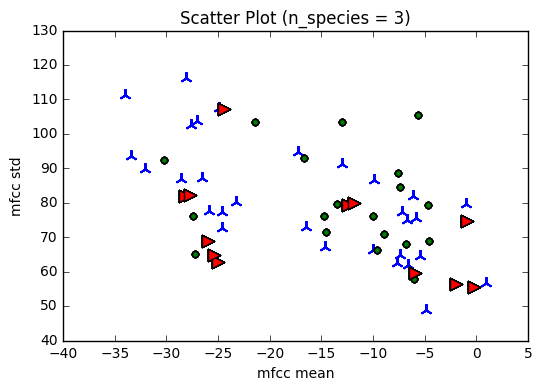

In [141]:
util.plot_scatter(data_o[:,0], data_o[:,1], labels, feat + ' mean', feat + ' std')

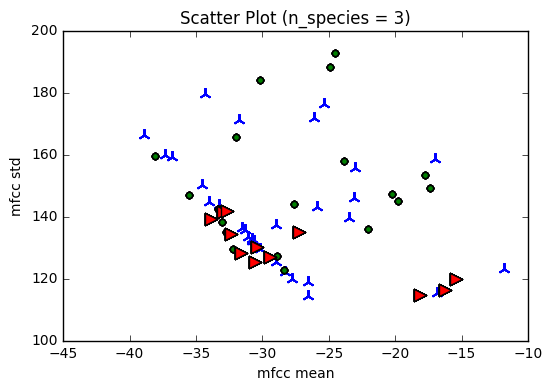

In [142]:
util.plot_scatter(data_f1[:,0], data_f1[:,1], labels, feat + ' mean', feat + ' std')

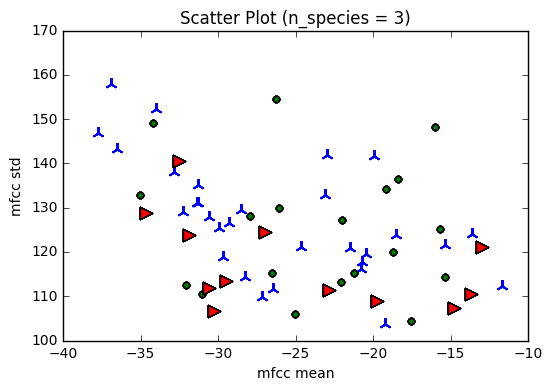

In [143]:
util.plot_scatter(data_f2[:,0], data_f2[:,1], labels, feat + ' mean', feat + ' std')

In [132]:
def generate_scores(clf, clf_name, data, labels, scoring, cv = 5):
    scores  = cross_val_score(clf, data, labels, n_jobs = -1, cv = cv, scoring = scoring)
    print(scores)
    print('{0} - {1}: {2:.2f} (+/- {3:.2f})'.format(clf_name, scoring, scores.mean(), scores.std() * 2))


In [138]:
clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')

generate_scores(clf, 'kNN', data_o, labels_o, scoring)
generate_scores(clf, 'kNN', data_f1, labels_f1, scoring)
generate_scores(clf, 'kNN', data_f2, labels_f2, scoring)

[ 0.23076923  0.33406593  0.55555556  0.41880342  0.42077922]
kNN - f1_weighted: 0.39 (+/- 0.21)


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.2965035   0.76162299  0.42361111  0.63492063  0.64545455]
kNN - f1_weighted: 0.55 (+/- 0.34)


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.36752137  0.48351648  0.61666667  0.44444444  0.47186147]
kNN - f1_weighted: 0.48 (+/- 0.16)


In [139]:
clf     = GaussianNB()

generate_scores(clf, 'gNB', data_o, labels_o, scoring)
generate_scores(clf, 'gNB', data_f1, labels_f1, scoring)
generate_scores(clf, 'gNB', data_f2, labels_f2, scoring)

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.06837607  0.28846154  0.33333333  0.28571429  0.39118457]
gNB - f1_weighted: 0.27 (+/- 0.22)
[ 0.42077581  0.68469992  0.46753247  0.5         0.46635183]
gNB - f1_weighted: 0.51 (+/- 0.18)
[ 0.32967033  0.41025641  0.64285714  0.60966811  0.61818182]
gNB - f1_weighted: 0.52 (+/- 0.25)


In [140]:
clf = svm.SVC(kernel = 'linear', C = 1, decision_function_shape='ovr')

generate_scores(clf, 'SVM', data_o, labels_o, scoring)
generate_scores(clf, 'SVM', data_f1, labels_f1, scoring)


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.06837607  0.29149798  0.33333333  0.41666667  0.3030303 ]
SVM - f1_weighted: 0.28 (+/- 0.23)


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.42077581  0.772612    0.64285714  0.4957265   0.41358641]
SVM - f1_weighted: 0.55 (+/- 0.28)
